In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  



In [85]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


EDA and preprocessing

In [86]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [87]:
X.shape

(45211, 16)

In [88]:
#checking duplicated values
X.duplicated().sum()

0

In [89]:
#checking null values
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [91]:
X.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [92]:
X.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,44923,45211,43354,45211,45211,45211,32191,45211,8252
unique,11,3,3,2,2,2,2,12,3
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901


In [93]:
quantitative_variables  = X.select_dtypes(exclude='object').columns

In [42]:
qualitatves_variables  = X.select_dtypes(exclude='int64').columns

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


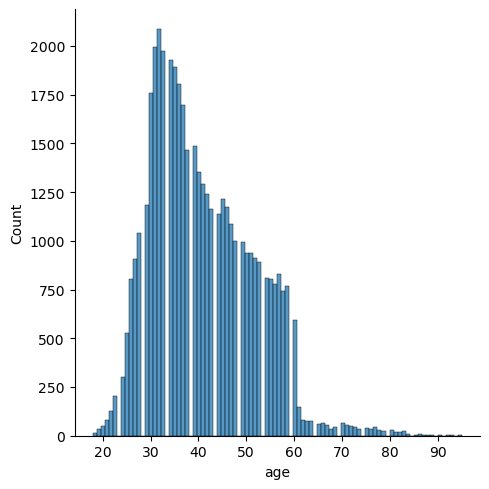

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


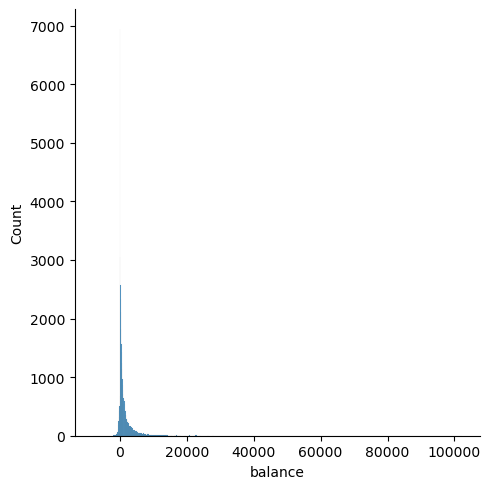

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


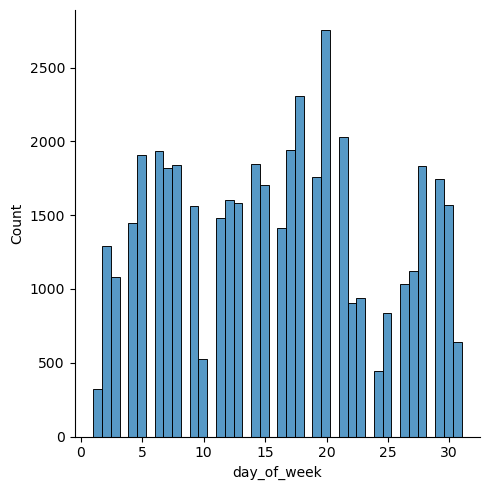

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


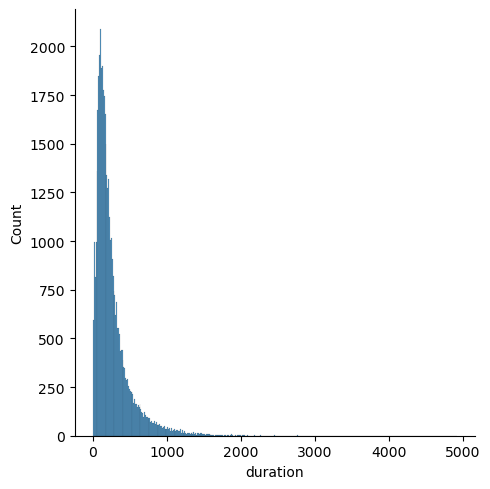

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


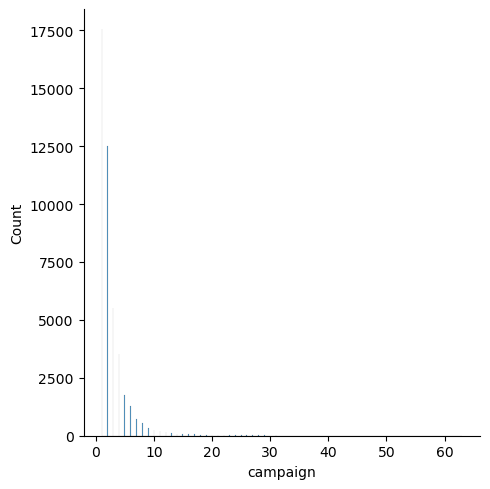

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


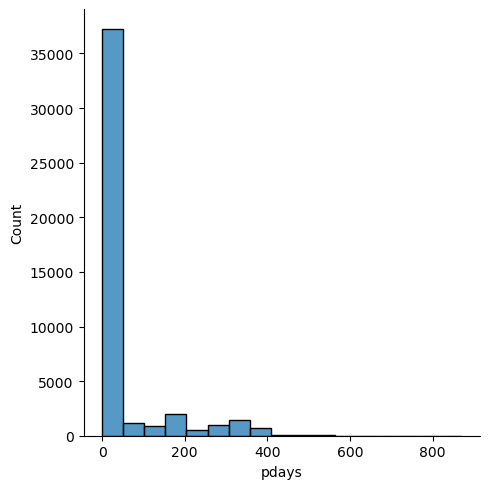

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


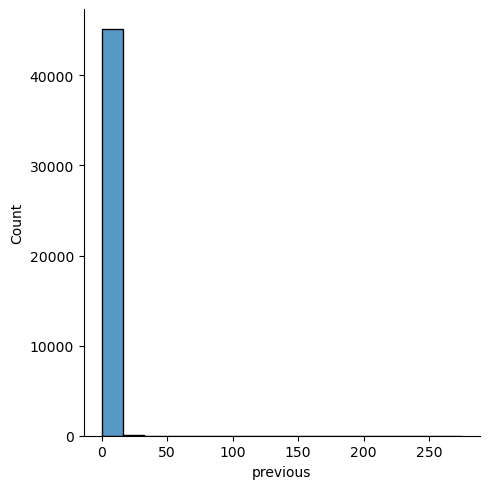

In [41]:
for var in quantitative_variables:
    sns.displot(data=X,x=var)
    plt.show()

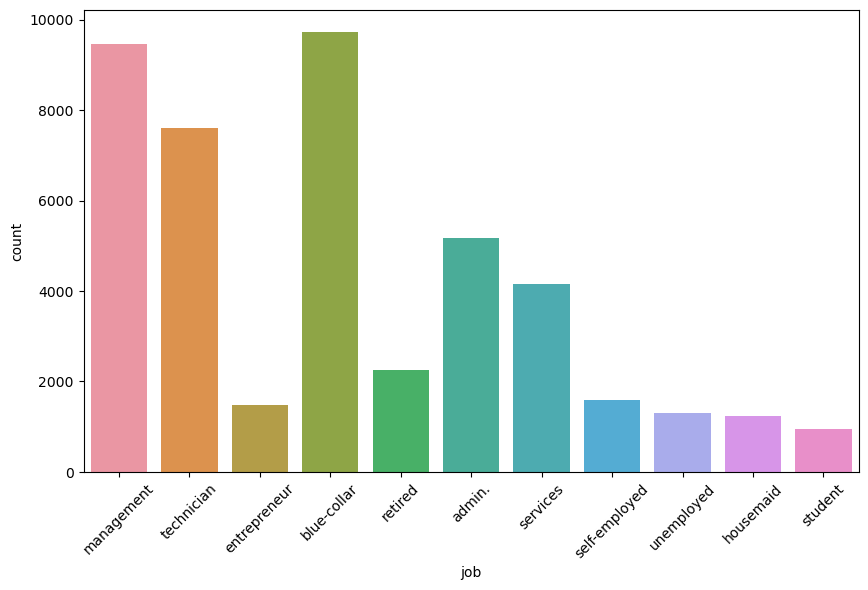

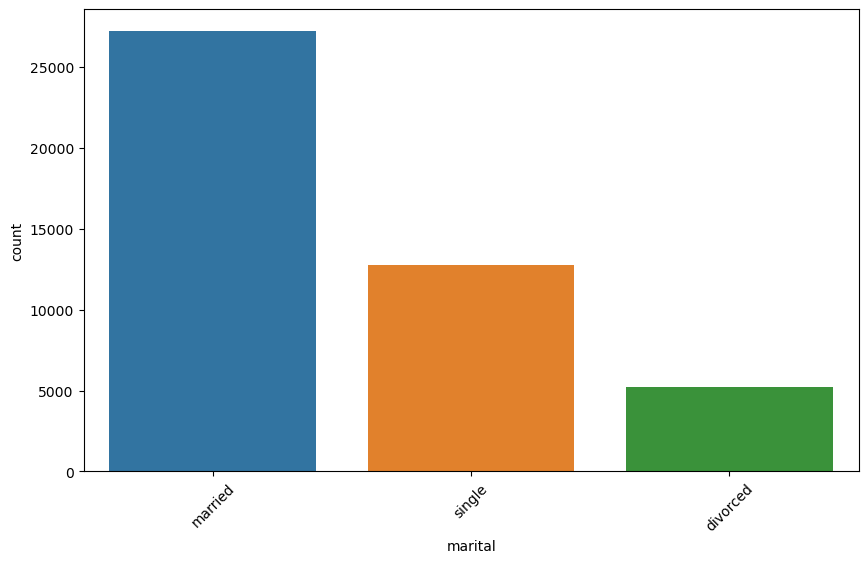

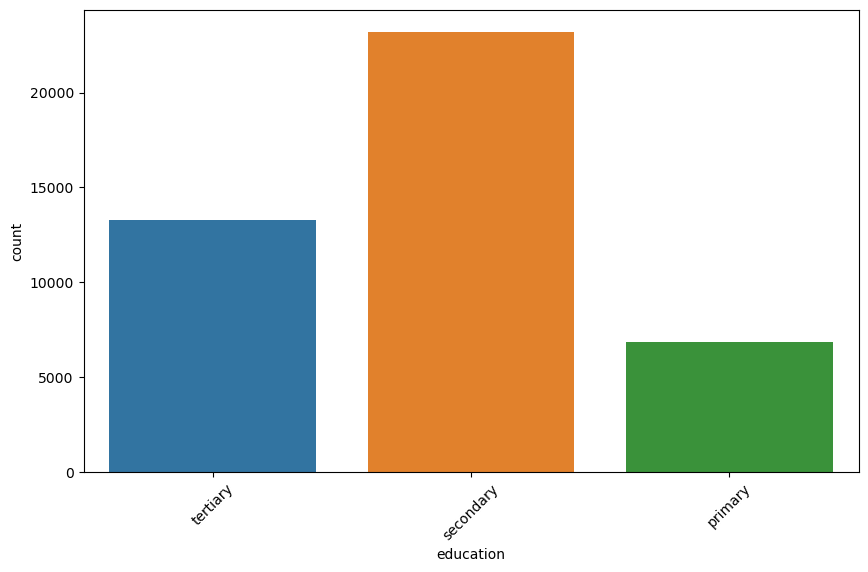

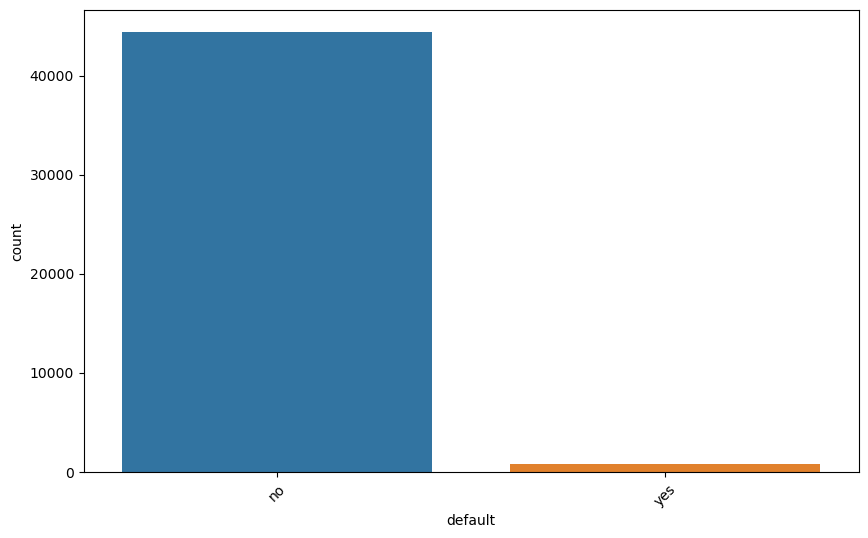

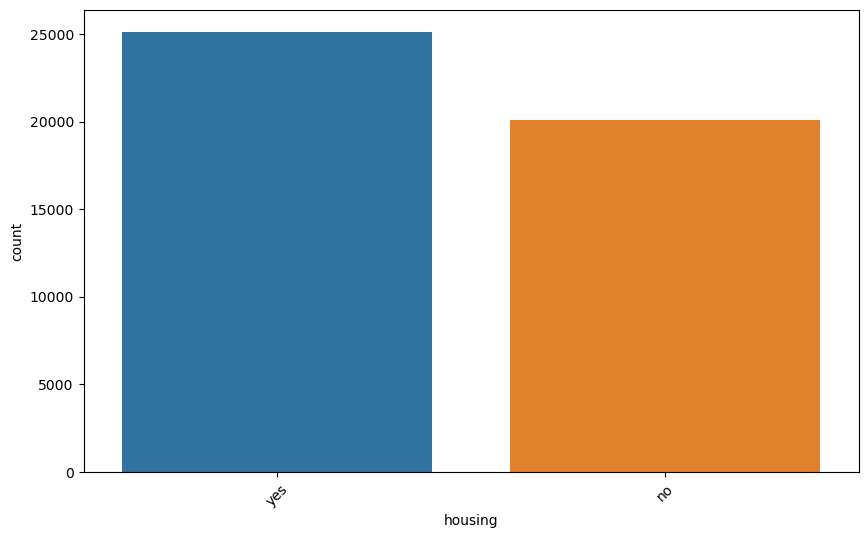

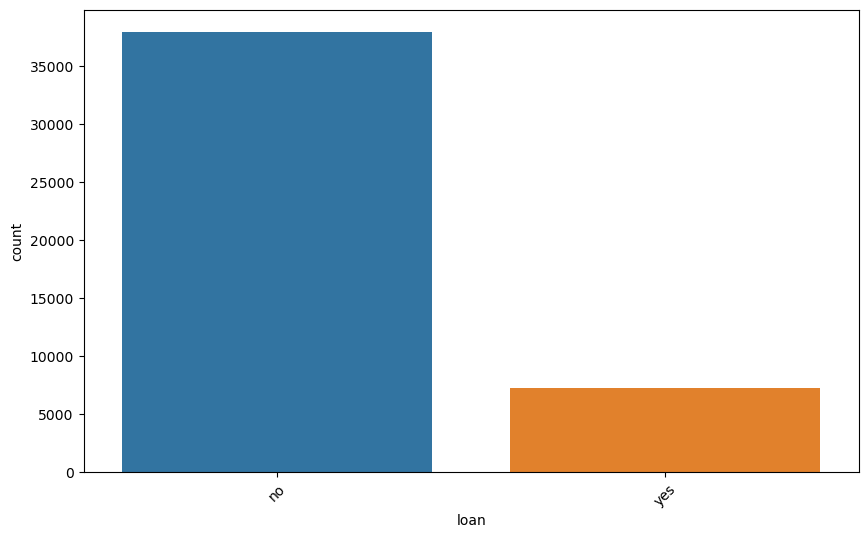

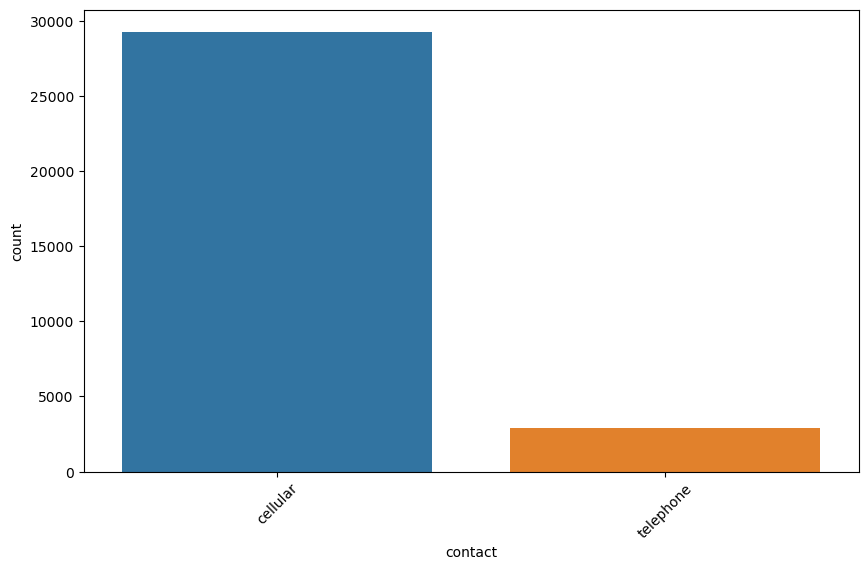

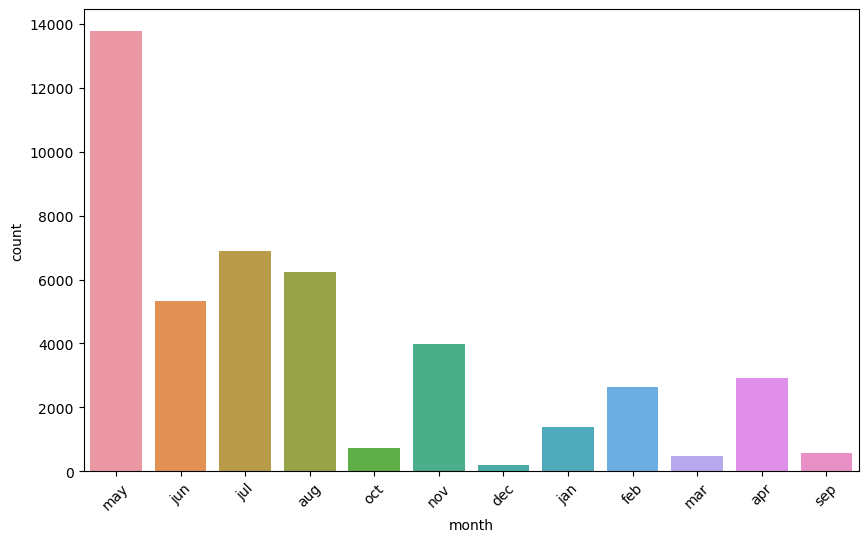

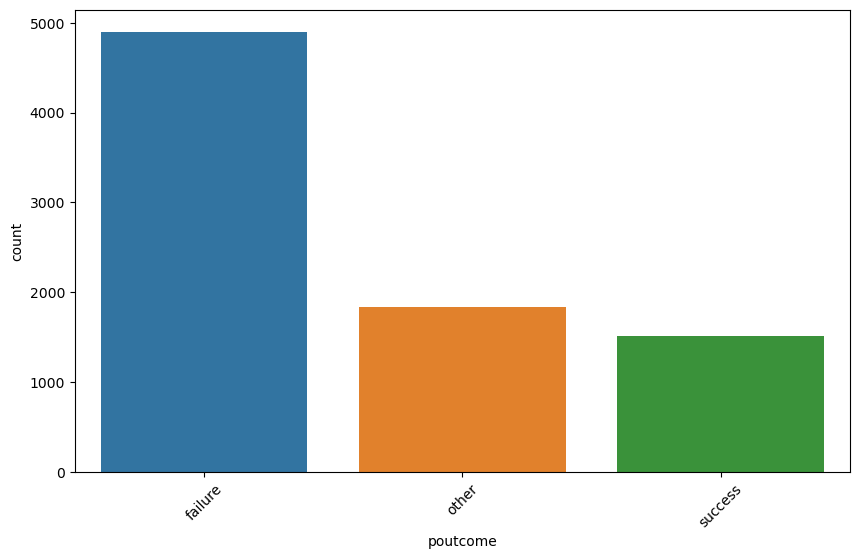

In [46]:
for var in qualitatves_variables:
    plt.figure(figsize=(10,6))
    sns.countplot(X,x=var)
    plt.xticks(rotation=45)
    plt.show()

handling missing variables: missing values ​​are imputed by the most frequent values

In [96]:
X['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64

In [130]:
X['job'] = X['job'].fillna('blue-collar')


/var/folders/wk/qmx8rtb10ldbmlm2cdrtk6dh0000gn/T/ipykernel_85319/398724753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['job'] = X['job'].fillna('blue-collar')


In [131]:
X['education'] = X['education'].fillna('secondary')

/var/folders/wk/qmx8rtb10ldbmlm2cdrtk6dh0000gn/T/ipykernel_85319/372650770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'] = X['education'].fillna('secondary')


In [132]:
#column poutcome is removed because it content many missing values
X = X.drop('poutcome',axis=1)

In [133]:
X['default'] = X['default'].fillna('default')

In [134]:
X['housing'] = X['housing'].fillna('yes')

In [135]:
X['loan'] = X['loan'].fillna('no')

In [136]:
X['contact'] = X['contact'].fillna('cellular')

In [137]:
X.head()


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0


Encoding qualitatives variables

In [138]:
from sklearn.preprocessing import OrdinalEncoder

In [139]:
ord_encoder = OrdinalEncoder()

In [140]:
features_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month']

In [142]:
for variable in features_to_encode:
    X[variable] = ord_encoder.fit_transform(X[variable].values.reshape(-1,1))
    

In [145]:
#encoding target
y = ord_encoder.fit_transform(y)

Tree Decision algorithm

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [152]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [165]:
model = DecisionTreeClassifier(class_weight="balanced")

In [166]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [169]:
model.score(X_test,y_test)

0.8721663164878912

In [173]:
y_pred = model.predict(X_test)

In [170]:
from sklearn.metrics import classification_report

In [175]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      8053
         1.0       0.42      0.41      0.41       990

    accuracy                           0.87      9043
   macro avg       0.67      0.67      0.67      9043
weighted avg       0.87      0.87      0.87      9043



Evaluation using cross validation

In [214]:
scores = cross_val_score(model,X,y,cv=cv,scoring='accuracy')

print("Cross validation Scores:", scores)
print("Mean accurary :", np.mean(scores))

Cross validation Scores: [0.86110804 0.86971909 0.86109268 0.87447467 0.87016147]
Mean accurary : 0.867311189824389


In [215]:
scores = cross_val_score(model,X,y,cv=cv,scoring='recall')

print("Cross validation Scores:", scores)
print("Mean recall :", np.mean(scores))

Cross validation Scores: [0.39871677 0.40693069 0.40090498 0.42745098 0.4289746 ]
Mean recall : 0.4125956049254752


In [216]:
scores = cross_val_score(model,X,y,cv=cv,scoring='f1')

print("Cross validation Scores:", scores)
print("Mean f1 :", np.mean(scores))

Cross validation Scores: [0.41489863 0.40863454 0.42031687 0.42721361 0.4382896 ]
Mean f1 : 0.42187064956481307


resampling the dataset to balance the classes for better results

In [191]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [218]:
tree_decision = DecisionTreeClassifier()

In [217]:
X_train_res,X_test_res,y_train_res,y_test_res = train_test_split(X_res,y_res,test_size=0.2)

In [219]:
tree_decision.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

In [220]:
y_pred_after_res = tree_decision.predict(X_test_res)

In [221]:
print(classification_report(y_test_res, y_pred_after_res))

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      8058
         1.0       0.90      0.92      0.91      7911

    accuracy                           0.91     15969
   macro avg       0.91      0.91      0.91     15969
weighted avg       0.91      0.91      0.91     15969



Evaluation using cross validation after resamplig data

In [222]:
scores = cross_val_score(model,X_res,y_res,cv=cv,scoring='accuracy')

print("Cross validation scores :", scores)
print("Mean accuracy :", np.mean(scores))

Cross validation scores : [0.9113282  0.91245538 0.91502286 0.91464713 0.91702154]
Mean accuracy : 0.9140950218741699


In [223]:
scores = cross_val_score(model,X_res,y_res,cv=cv,scoring='recall')

print("Cross validation scores :", scores)
print("Mean recall :", np.mean(scores))

Cross validation scores : [0.91899268 0.91524135 0.92073018 0.91862769 0.92135258]
Mean recall : 0.9189888987741661


In [224]:
scores = cross_val_score(model,X_res,y_res,cv=cv,scoring='f1')

print("Cross validation scores :", scores)
print("f1 recall :", np.mean(scores))

Cross validation scores : [0.91309971 0.91182415 0.91553066 0.9151246  0.91664565]
f1 recall : 0.9144449538705363
